<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN 분류에 사용할 데이터 - 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data)

In [4]:
data = iris_data['data'] #독립변수
data.shape #150개 X (petal-length, petal-width, sepal-length, sepal-width)

(150, 4)

In [5]:
target = iris_data['target'] #종속변수
target.shape #150개 ([0:50]>=0, [50:100]>=1, [100:]>=2)

(150,)

In [6]:
tname = iris_data['target_names']
tname # 0:setosa, 1:versicolor, 3:virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
for i,t in enumerate(target):
  print(f"{i}:{tname[t]}")

In [10]:
def distance(x1,x2):
  return sum((x1-x2)**2)**(1/2)

In [11]:
import numpy as np
na1 = np.array([1,2])
na2 = np.array([5,5])
print(distance(na1,na2))

5.0


In [13]:
def find_k_nearest_neighbor_c(xs,ys,tx,k=5): #k개 이웃 중, 가장 많이 분포되어 있는 값 찾기
  sarr = []
  for i,x in enumerate(xs):
    dis = distance(x,tx)
    sarr.append((dis,i)) #거리순으로 정렬한 이후에도 몇 번째 요소인지 기억하기 위해 (dis,i)를 보관
  sarr.sort(key= lambda x:x[0])
  nd = {} #어떠한 클래스에 속하는지 분포를 파악해서 보관하기 위한 용도 --> 여기부터 지난번 방법과 차이남
  for x in sarr[:k]:
    neighbor = ys[x[1]] #x[0]은 거리 x[1]은 인덱스이므로, 원하는 값은 ys[인덱스]
    if neighbor in nd:
      nd[neighbor] += 1
    else:
      nd[neighbor] = 0
  return max(nd, key=nd.get) #가장 많이 나온 클래스를 반환

In [14]:
def find_k_nearest_neighbors_c(xs,ys,t_xs,k=5): #테스트용
  return np.array([find_k_nearest_neighbor_c(xs,ys,tx,k) for tx in t_xs])

In [16]:
data.shape, target.shape #두 자료의 행의 개수가 동일하므로, 사용 가능

((150, 4), (150,))

In [17]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(data,target) #학습 데이터와 테스트 데이터로 분리
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((112, 4), (38, 4), (112,), (38,))

In [21]:
pred_val = find_k_nearest_neighbors_c(train_xs,train_ys,test_xs) #학습 후 예측하시오

In [23]:
print(f"예측 결과:{pred_val}")
print(f"실제 결과:{test_ys}") #두 값을 비교하여 얼마나 동일한지 확인

예측 결과:[1 2 0 1 1 0 0 2 1 2 0 1 1 2 2 2 1 2 1 0 1 2 2 0 2 0 0 0 2 1 0 0 2 2 1 2 1
 0]
실제 결과:[2 2 0 1 1 0 0 2 1 2 0 1 1 2 2 2 1 1 1 0 1 2 2 0 2 0 0 0 2 1 0 0 2 2 1 2 1
 0]


In [24]:
import matplotlib.pyplot as plt

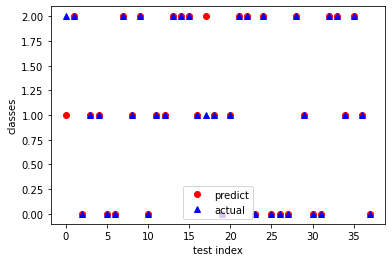

In [28]:
plt.plot(pred_val, 'ro', label='predict')
plt.plot(test_ys, 'b^', label='actual')
plt.xlabel("test index")
plt.ylabel("classes")
plt.legend()
plt.show()

In [30]:
def evaluate(actual_ys, predict_ys):
  correct_cnt = 0
  for i,y in enumerate(actual_ys):
    if predict_ys[i] == y:
      correct_cnt += 1
  return correct_cnt/len(actual_ys)

In [32]:
print(evaluate(test_ys, pred_val))

0.9473684210526315


#ML 개체 사용(사이킷 런의 KNN분류 모델)

In [34]:
from sklearn.neighbors import KNeighborsClassifier #KNN분류모델

knc_model = KNeighborsClassifier() #모델 개체 생성
knc_model.fit(train_xs,train_ys) #학습
pred_val2 = knc_model.predict(test_xs) #예측하시오

In [36]:
print(f"예측 결과1:{pred_val}")
print(f"예측 결과2:{pred_val2}")
print(f"실제 결과:{test_ys}")

예측 결과1:[1 2 0 1 1 0 0 2 1 2 0 1 1 2 2 2 1 2 1 0 1 2 2 0 2 0 0 0 2 1 0 0 2 2 1 2 1
 0]
예측 결과2:[1 2 0 1 1 0 0 2 1 2 0 1 1 2 2 2 1 2 1 0 1 2 2 0 2 0 0 0 2 1 0 0 2 2 1 2 1
 0]
실제 결과:[2 2 0 1 1 0 0 2 1 2 0 1 1 2 2 2 1 1 1 0 1 2 2 0 2 0 0 0 2 1 0 0 2 2 1 2 1
 0]


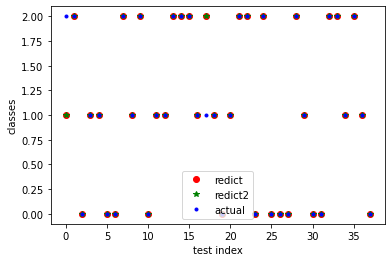

In [37]:
plt.plot(pred_val, 'ro', label='redict')
plt.plot(pred_val2, 'g*', label='redict2')
plt.plot(test_ys, 'b.', label='actual')
plt.xlabel("test index")
plt.ylabel('classes')
plt.legend()
plt.show()

###1. 이항 분류(이진 분류)  
: 둘 중 하나를 결정하는 문제 / T or F를 결정하는 문제  
  - sigmoid(선형 회귀) => 로지스틱 회귀  
    - -1 <= sigmoid(x) <= 1 (그래프 확인)
    - 0.5 <= sigmoid(x) <= 1 ===> T  
    - 0 < sigmoid(x) <= 0.5 ===> F

###2. 다항 분류(KNN 분류)  
: 로지스틱 회귀 응용, 클래스가 n개 있을 때  
  클래스 1일 확률 : P1    
  클래스 2일 확률 : P2  
  클래스 3일 확률 : P3  
  클래스 4일 확률 : P4  
  클래스 n일 확률 : Pn   
  -> 해당 로지스틱 회귀를 n번 수행한다  
     P1 + P2 + P3 + ... + Pn = Sp  
     P1 + P2 + P3 + ... + Pn / Sp = 1  
     = soft max (https://en.wikipedia.org/wiki/Softmax_function)
  


###3. ML 의 분류 기준에 따른 분류
- ML(Machin Learning)  
- DL(Deep Learning)  
https://bangu4.tistory.com/95
-----------------------------------
- 지도 L(Learning, 학습) : 실행해야 할 작업을 쌓아두기 -> 학습 -> 예측
  - 회귀
  - 분류
- 비지도 L
  - 강화
  - 군집
  - 이상점

###4. 평면상의 점들을 근처 모임끼리 3개로 군집화  
1. 3개의 랜덤한 중심점 선택  
2. 모든 점을 3개의 중심점과 거리 계산하여 군집화  
3. 중심점 계산

###5. KMeans
k-평균 알고리즘(K-means clustering algorithm)은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다. 이 알고리즘은 자율 학습의 일종으로, 레이블이 달려 있지 않은 입력 데이터에 레이블을 달아주는 역할을 수행한다. 이 알고리즘은 EM 알고리즘을 이용한 클러스터링과 비슷한 구조를 가지고 있다.